# Tracking Near-Earth Objects (NEOs): Exploratory Data Analysis

## Introduction:

The Near-Earth Object Web Service (NeoWs), NASA provides detailed information on objects that come close to the Earth's orbit. These objects are monitored closely due to the potential threat that they possess. This project focuses on Exploratory data analysis and hypothesis testing of factors that may affect the potential of whether the object is hazardous or not.

## Objective:
The purpose of the project is to:
    1. Analyse the relationship between object size, its velocity and their hazardous classification.
    2. Identify clusters within the dataset on the basis of the key features.
    3. Build predictive model to identify hazardous Neos using their key features.

## Data Collection: 
For this project, I obtained a dataset from NASA that provides detailed information about the NEOs and their approximate distance from Earth. The data is extracted via the NASA API for the month of January 2023. Due to the API's 7 days data fetch limit, the data is collected in 4 separate chunks, each corresponding to 7-day period in the month of January 2023. These chunks are then, merged to form a complete dataset for the entire month of January.

Source: NASA Asteroids NeoWs (Near Earth Object Web Service)
Time Period: January 2023

In [604]:
import requests  # Import the requests module to make HTTP requests
import json      # Import the json module to handle JSON data
import pandas as pd
# NASA API Key
api_key = '43CeF9mMNkbz8M1IhqOEYi3ici40QBdXXT2IXwMX'

# Function to make a request to the NASA API and fetch the data
def get_nasa_data(start_date, end_date, api_key):
    try:
        # Base URL for NASA's API
        base_url = "https://api.nasa.gov/neo/rest/v1/feed"
        # Make the GET request to the NASA API with the specified parameters (date range and API key)
        request = requests.get(base_url, params={'start_date': start_date, 'end_date': end_date, 'api_key': api_key})

        # Check if the request was successful (status code 200)
        if request.status_code == 200:
            # Print response to verify data
            print(f"fetched data for {start_date} to {end_date}")
            return request.json()  # Return the data as JSON
        else:
            print(f"data wasn't fetched for {start_date} to {end_date}, Status Code: {request.status_code}")
            return None
    except:
        print(f"An error occurred")
        return None

In [605]:
date_ranges = [
    ("2023-01-01", "2023-01-07"),
    ("2023-01-08", "2023-01-14"),
    ("2023-01-15", "2023-01-21"),
    ("2023-01-22", "2023-01-28"),
    ("2023-01-29", "2023-02-04"),
    ("2023-02-05", "2023-02-11"),
    ("2023-02-12", "2023-02-18"),
    ("2023-02-19", "2023-02-25"),
    ("2023-02-26", "2023-03-04"),
    ("2023-03-05", "2023-03-11"),
    ("2023-03-12", "2023-03-18"),
    ("2023-03-19", "2023-03-25"),
    ("2023-03-26", "2023-04-01"),
    ("2023-04-02", "2023-04-08"),
    ("2023-04-09", "2023-04-15"),
    ("2023-04-16", "2023-04-22"),
    ("2023-04-23", "2023-04-29"),
    ("2023-04-30", "2023-05-06"),
    ("2023-05-07", "2023-05-13"),
    ("2023-05-14", "2023-05-20"),
    ("2023-05-21", "2023-05-27"),
    ("2023-05-28", "2023-06-03"),
    ("2023-06-04", "2023-06-10"),
    ("2023-06-11", "2023-06-17"),
    ("2023-06-18", "2023-06-24"),
    ("2023-06-25", "2023-06-30")
]

# Initialize an empty list to hold the combined data for all 4 weeks
neo_data = []

# Loop through each date range, fetch the data and append it to the list
for start_date, end_date in date_ranges:
    data = get_nasa_data(start_date, end_date, api_key)
    if data:
        neo_data.append(data)  # Append data if fetched successfully
    else:
        print(f"No data found for {start_date} to {end_date}")

# Check if neo_data is not empty and then turn it into dataframe using pandas library
if neo_data:
    neo_df = pd.DataFrame(neo_data)
else:
    print("No data was retrieved for the given date ranges.")


print(neo_df)
neo_df.head()
print(neo_df['near_earth_objects'])


fetched data for 2023-01-01 to 2023-01-07
fetched data for 2023-01-08 to 2023-01-14
fetched data for 2023-01-15 to 2023-01-21
fetched data for 2023-01-22 to 2023-01-28
fetched data for 2023-01-29 to 2023-02-04
fetched data for 2023-02-05 to 2023-02-11
fetched data for 2023-02-12 to 2023-02-18
fetched data for 2023-02-19 to 2023-02-25
fetched data for 2023-02-26 to 2023-03-04
fetched data for 2023-03-05 to 2023-03-11
fetched data for 2023-03-12 to 2023-03-18
fetched data for 2023-03-19 to 2023-03-25
fetched data for 2023-03-26 to 2023-04-01
fetched data for 2023-04-02 to 2023-04-08
fetched data for 2023-04-09 to 2023-04-15
fetched data for 2023-04-16 to 2023-04-22
fetched data for 2023-04-23 to 2023-04-29
fetched data for 2023-04-30 to 2023-05-06
fetched data for 2023-05-07 to 2023-05-13
fetched data for 2023-05-14 to 2023-05-20
fetched data for 2023-05-21 to 2023-05-27
fetched data for 2023-05-28 to 2023-06-03
fetched data for 2023-06-04 to 2023-06-10
fetched data for 2023-06-11 to 202

## Data Extraction and Transformation for NEOs
Now that, I have extracted the data from the NASA API and collected all the 4 weeks of data, I will tranform the raw JSON data into a structured format using Python's `pandas` library. The goal is to extract the key details about the NEOs (Near Earth Objects) and use them as variables.
The key variables chosen here are:
1. `id`: a unique identifier for each NEO
2. `name`: the name of the NEO
3. `absolute_magnitude_h`: the brightness of the NEO, which is an indicator of its size and reflectivity. The absolute magnitude H is a measure of the asteroid’s intrinsic mean brightness, estimated from measurements of its apparent magnitudes at the various times it has been observed, at various distances from the Sun and Earth, and at various phase angles. Also, since the actual shape of the asteroid is usually unknown, it is simply assumed to be spherical.
4. `estimated_diameter_min_km` & `estimated_diameter_max_km`: the minimun and maximum diameter of the NEO in kilometers.
5. `is_potentially_hazardous_asteroid`: 
6. `close_approach_data`:
7. `is_sentry_object`:

In [606]:
"""
extract the 'near_earth_objects' data to form the dataframe
"""

#initialize the neo_df as empty list to store the new data
df =[]

# create a loop through the NEO data
for each_week in neo_df['near_earth_objects']:
    for date, objects in each_week.items():
        for neo in objects:
            df.append({
                'Date': date, 'ID': neo['id'], 'Name': neo['name'], 'Abs_magnitude': neo['absolute_magnitude_h'], 'Min_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Max_diameter': neo['estimated_diameter']['kilometers']['estimated_diameter_max'], 'Potential_hazard': neo['is_potentially_hazardous_asteroid'], 
                'Close_approach_date': neo['close_approach_data'][0]['close_approach_date'], 'Relative_velocity': neo['close_approach_data'][0]['relative_velocity']['kilometers_per_second'], 
                'Miss_distance': neo['close_approach_data'][0]['miss_distance']['astronomical'], 'Orbiting_body': neo['close_approach_data'][0]['orbiting_body'], 
                'Sentry_object': neo['is_sentry_object']
            })

df = pd.DataFrame(df)
print(df.head())


         Date       ID               Name  Abs_magnitude  Min_diameter  \
0  2023-01-01  2154347  154347 (2002 XK4)          16.08      1.616423   
1  2023-01-01  2385186  385186 (1994 AW1)          17.64      0.788052   
2  2023-01-01  2453309  453309 (2008 VQ4)          19.51      0.333085   
3  2023-01-01  3683468       (2014 QR295)          18.39      0.557898   
4  2023-01-01  3703782        (2015 AE45)          25.30      0.023150   

   Max_diameter  Potential_hazard Close_approach_date Relative_velocity  \
0      3.614431             False          2023-01-01     27.3921993676   
1      1.762138              True          2023-01-01     12.9241938417   
2      0.744801             False          2023-01-01       5.822172435   
3      1.247498             False          2023-01-01     16.1804693508   
4      0.051765             False          2023-01-01      6.8621510862   

  Miss_distance Orbiting_body  Sentry_object  
0  0.3312263376         Earth          False  
1  0.22328

## Data Preparation and Cleaning

### Handling the missing values 
Once we have converted the data into a dataframe, next we check for any missing values and the ways to address the issue.
Since, there are no missing values in the dataset, we can move ahead to other aspects of the data preparation.

In [607]:
# checking for any missing values in the dataframe
df.isnull().sum()

Date                   0
ID                     0
Name                   0
Abs_magnitude          0
Min_diameter           0
Max_diameter           0
Potential_hazard       0
Close_approach_date    0
Relative_velocity      0
Miss_distance          0
Orbiting_body          0
Sentry_object          0
dtype: int64

In [739]:
assert pd.notnull(df).all().all()

### Enriching the data 
To enrich the dataset by performing the following steps:
- Parsing Dates: The dates columns - `Date` and `Close_approach_date` are currently stored as strings. Now, we'll convert it into `datetime` object for better analysis.
- Extracting Data Features: The following are the additional features that we are adding into the dataframe-
    1. Relative Velocity (in km/s): `Relative_velocity_km_s`

### Parsing Dates
To convert `Date` and `Close_approach_date` columns into `datetime` format, we use `pd.to_datetime()

In [608]:
import datetime 

df['Date'] = pd.to_datetime(df['Date'])
df['Close_approach_date'] = pd.to_datetime(df['Close_approach_date'])

### Data Feature Engineering
In this step, we create new features to further enhance our analysis. The following features are derived from the existing columns and provide more details about the NEOs.
1. Average Diameter (in km) - this feature is the average of the minimum diameter and the maximum diameter of a specific NEO. The feature simplies the diameter range into a single value, making it easier for visualization and analysis.
2. Relative Velocity (in km/s): this feature represents the relative velocity in kilometer/second. Doing so is essential since it is the standard unit for measuring speed in space and makes it easier to interpret the results.

In [609]:
# relative velocity (in km/s)
df['Relative_velocity'] = pd.to_numeric(df['Relative_velocity'])
df['Relative_velocity_km_s'] = df['Relative_velocity'] / 3600

In [610]:
df.head()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Relative_velocity_km_s
0,2023-01-01,2154347,154347 (2002 XK4),16.08,1.616423,3.614431,False,2023-01-01,27.392199,0.3312263376,Earth,False,0.007609
1,2023-01-01,2385186,385186 (1994 AW1),17.64,0.788052,1.762138,True,2023-01-01,12.924194,0.2232885314,Earth,False,0.003590
2,2023-01-01,2453309,453309 (2008 VQ4),19.51,0.333085,0.744801,False,2023-01-01,5.822172,0.2644821197,Earth,False,0.001617
3,2023-01-01,3683468,(2014 QR295),18.39,0.557898,1.247498,False,2023-01-01,16.180469,0.2629103243,Earth,False,0.004495
4,2023-01-01,3703782,(2015 AE45),25.30,0.023150,0.051765,False,2023-01-01,6.862151,0.0569979859,Earth,False,0.001906


In [611]:
df.tail()

,Date,ID,Name,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Relative_velocity,Miss_distance,Orbiting_body,Sentry_object,Relative_velocity_km_s
3438,2023-06-29,54373716,(2023 MN1),24.98,0.026826,0.059985,False,2023-06-29,14.989726,0.0243695351,Earth,False,0.004164
3439,2023-06-29,54373750,(2023 MR1),23.84,0.045348,0.101400,False,2023-06-29,12.087756,0.0152845954,Earth,False,0.003358
3440,2023-06-29,54373928,(2023 MX2),28.32,0.005762,0.012884,False,2023-06-29,4.295215,0.0030277452,Earth,False,0.001193
3441,2023-06-29,54374054,(2023 MT3),24.30,0.036691,0.082043,False,2023-06-29,18.228350,0.0725843568,Earth,False,0.005063
3442,2023-06-29,54374471,(2023 MH6),25.19,0.024353,0.054455,False,2023-06-29,10.712228,0.0044739586,Earth,False,0.002976


### Perform Exploratory Analysis
Exploring the data by taking a look at the data structure, descriptive statistics, distributions of the columns and the relationship between columns.

In [612]:
print(df.shape)

(3443, 13)


**Interpretation**
We can see that the dataset has 478 rows and 14 columns.

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3443 entries, 0 to 3442
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    3443 non-null   datetime64[ns]
 1   ID                      3443 non-null   object        
 2   Name                    3443 non-null   object        
 3   Abs_magnitude           3443 non-null   float64       
 4   Min_diameter            3443 non-null   float64       
 5   Max_diameter            3443 non-null   float64       
 6   Potential_hazard        3443 non-null   bool          
 7   Close_approach_date     3443 non-null   datetime64[ns]
 8   Relative_velocity       3443 non-null   float64       
 9   Miss_distance           3443 non-null   object        
 10  Orbiting_body           3443 non-null   object        
 11  Sentry_object           3443 non-null   bool          
 12  Relative_velocity_km_s  3443 non-null   float64 

**Interpretation**
We can see the data types of all the columns as well as the features engineered by us.
The column `Miss_distance` have the data type as object. We need to convert it into float data type.

In [614]:
df['Miss_distance'] = df['Miss_distance'].astype(float)

Dropping Unneccessary Columns

In [615]:
df = df.drop(['Name', 'Orbiting_body', 'Relative_velocity', 'Date'], axis = 1)
df.head()

,ID,Abs_magnitude,Min_diameter,Max_diameter,Potential_hazard,Close_approach_date,Miss_distance,Sentry_object,Relative_velocity_km_s
0,2154347,16.08,1.616423,3.614431,False,2023-01-01,0.331226,False,0.007609
1,2385186,17.64,0.788052,1.762138,True,2023-01-01,0.223289,False,0.003590
2,2453309,19.51,0.333085,0.744801,False,2023-01-01,0.264482,False,0.001617
3,3683468,18.39,0.557898,1.247498,False,2023-01-01,0.262910,False,0.004495
4,3703782,25.30,0.023150,0.051765,False,2023-01-01,0.056998,False,0.001906


In [616]:
df.describe()

,Abs_magnitude,Min_diameter,Max_diameter,Close_approach_date,Miss_distance,Relative_velocity_km_s
count,3443.000000,3443.000000,3443.000000,3443,3443.000000,3443.000000
mean,24.204499,0.095854,0.214337,2023-03-31 01:24:03.973278976,0.219078,0.003553
min,13.510000,0.000939,0.002099,2023-01-01 00:00:00,0.000067,0.000122
25%,22.330000,0.015295,0.034201,2023-02-17 00:00:00,0.065416,0.002147
50%,24.490000,0.033617,0.075169,2023-03-31 00:00:00,0.211420,0.003210
75%,26.200000,0.090898,0.203254,2023-05-11 12:00:00,0.357073,0.004619
max,32.260000,5.279040,11.804293,2023-06-30 00:00:00,0.499906,0.012730
std,2.799026,0.209449,0.468342,NaN,0.156110,0.001914


In [617]:
df.describe(include=('object','bool'))

,ID,Potential_hazard,Sentry_object
count,3443,3443,3443
unique,3337,2,2
top,54317187,False,False
freq,2,3229,3224


**Interpretation**

`Abs_magnitude`: 
- The range is from 13.5(brightest) to 31.2(dimmest). 
- The median is 24.34 which means that most objects are relatively dim.
- The variation is 2.87 which means that the data has moderate variation.

`Miss_distance`:
- The range is from 0.000067 AU (~10.000km, which is exceptionally close) to 0.498 AU.
- 


`Average_diameter`
- The 

### Identify the outliers and handle them

In [618]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

num_df = df.filter(['Abs_magnitude', 'Miss_distance', 'Min_diameter', 'Max_diameter', 'Relative_velocity_km_s'], axis=1)
z_scores = zscore(df.filter(['Abs_magnitude', 'Miss_distance', 'Min_diameter', 'Max_diameter', 'Relative_velocity_km_s'], axis=1))
outlier_threshold = 3.0
outliers_mask = np.abs(z_scores) > outlier_threshold

print(num_df[outliers_mask.any(axis=1)])

      Abs_magnitude  Miss_distance  Min_diameter  Max_diameter  \
0             16.08       0.331226      1.616423      3.614431   
1             17.64       0.223289      0.788052      1.762138   
54            17.13       0.439277      0.996678      2.228640   
69            20.10       0.492122      0.253837      0.567597   
115           16.23       0.470727      1.508534      3.373184   
...             ...            ...           ...           ...   
3195          17.21       0.462046      0.960627      2.148028   
3208          16.54       0.323672      1.307841      2.924422   
3246          19.85       0.379761      0.284810      0.636854   
3265          17.66       0.401896      0.780827      1.745983   
3302          23.38       0.478116      0.056047      0.125326   

      Relative_velocity_km_s  
0                   0.007609  
1                   0.003590  
54                  0.004783  
69                  0.009441  
115                 0.004616  
...                  

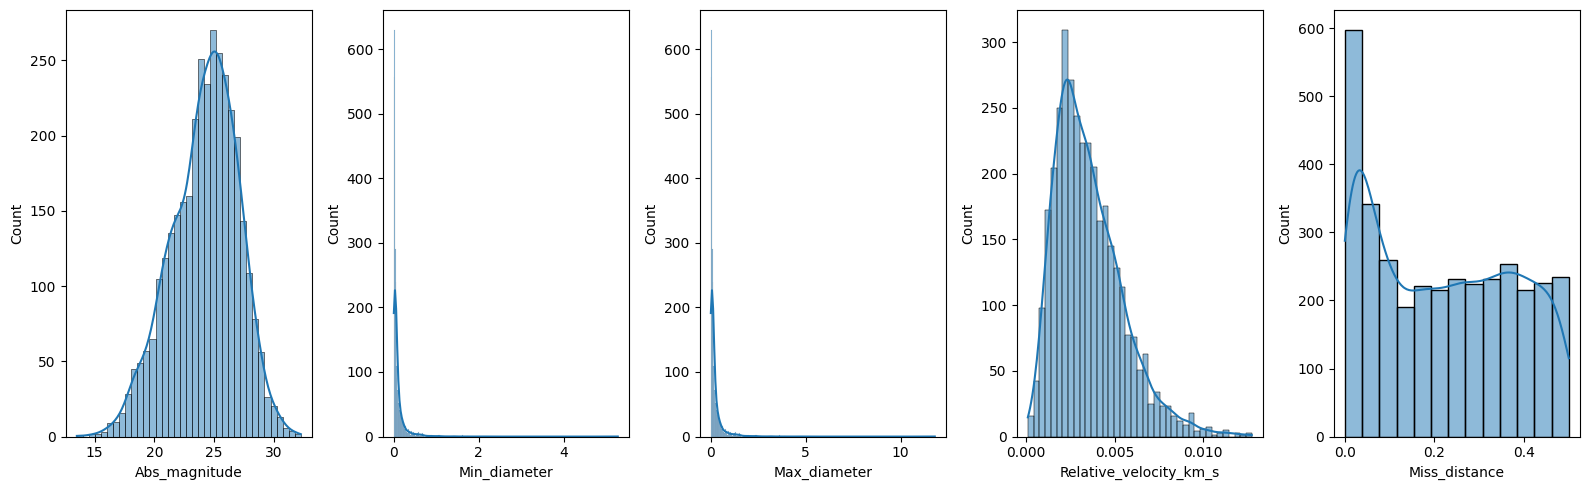

In [619]:
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
sns.histplot(df['Abs_magnitude'], kde=True)

plt.subplot(1,5,2)
sns.histplot(df['Min_diameter'], kde=True)

plt.subplot(1,5,3)
sns.histplot(df['Max_diameter'], kde=True)

plt.subplot(1,5,4)
sns.histplot(df['Relative_velocity_km_s'], kde=True)

plt.subplot(1,5,5)
sns.histplot(df['Miss_distance'], kde=True)

plt.show()

<Axes: ylabel='Miss_distance'>

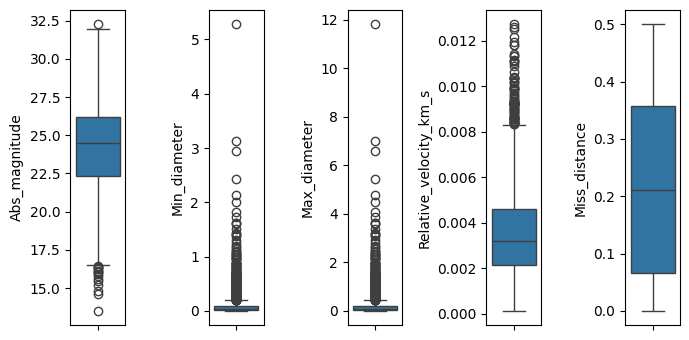

In [620]:
plt.subplot(1,5,1)
sns.boxplot(df['Abs_magnitude'])

plt.subplot(1,5,2)
sns.boxplot(df['Min_diameter'])

plt.subplot(1,5,3)
sns.boxplot(df['Max_diameter'])

plt.subplot(1,5,4)
sns.boxplot(df['Relative_velocity_km_s'])

plt.subplot(1,5,5)
sns.boxplot(df['Miss_distance'])

### Identify the outliers and handle them

In [621]:
percentile25 = df['Min_diameter'].quantile(0.25)
percentile75 = df['Max_diameter'].quantile(0.75)

iqr = percentile75 - percentile25
print(iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

0.1879592172
Upper limit 0.4851932365
Lower limit -0.2666436323


In [622]:
new_df = df[df['Max_diameter'] < upper_limit]
new_df.shape

(3089, 9)

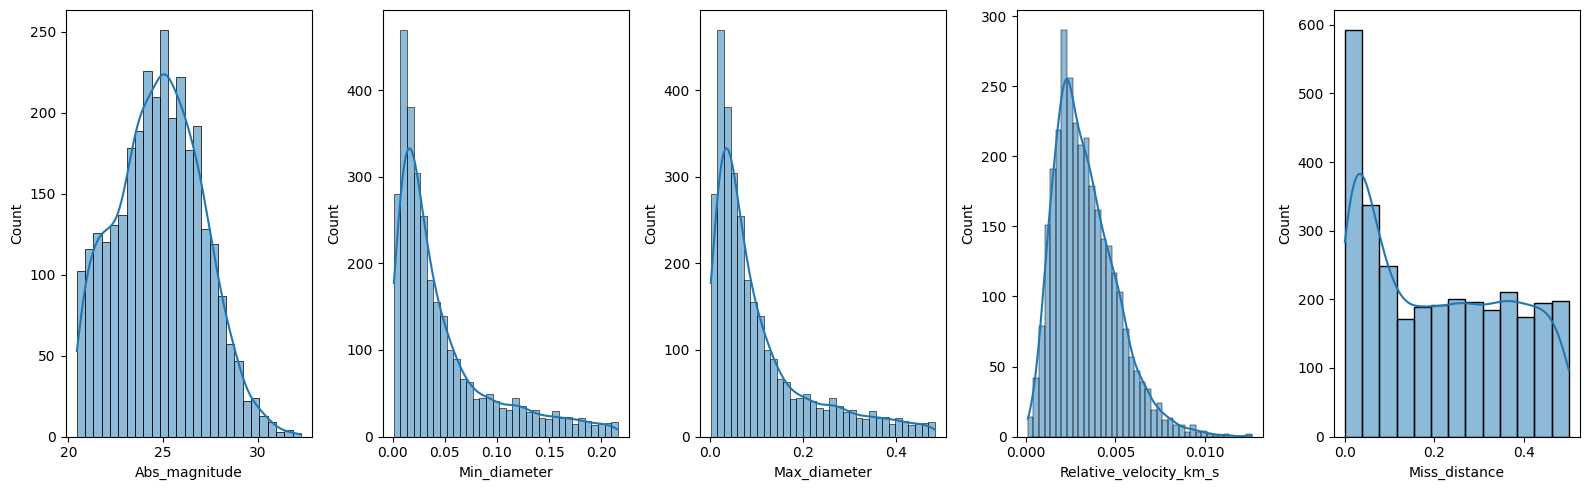

In [623]:
plt.figure(figsize=(16,5))
plt.subplot(1,5,1)
sns.histplot(new_df['Abs_magnitude'], kde=True)

plt.subplot(1,5,2)
sns.histplot(new_df['Min_diameter'], kde=True)

plt.subplot(1,5,3)
sns.histplot(new_df['Max_diameter'], kde=True)

plt.subplot(1,5,4)
sns.histplot(new_df['Relative_velocity_km_s'], kde=True)

plt.subplot(1,5,5)
sns.histplot(new_df['Miss_distance'], kde=True)

plt.show()

<Axes: ylabel='Miss_distance'>

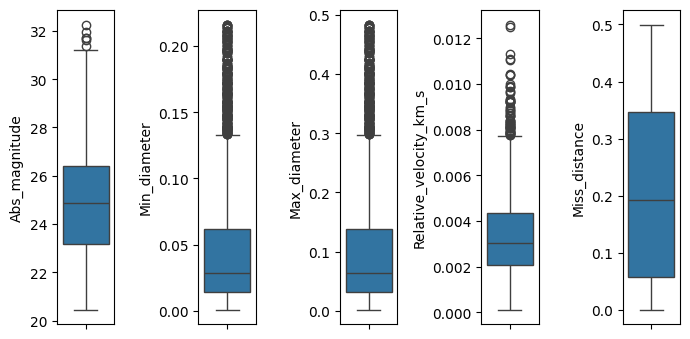

In [624]:
plt.subplot(1,5,1)
sns.boxplot(new_df['Abs_magnitude'])

plt.subplot(1,5,2)
sns.boxplot(new_df['Min_diameter'])

plt.subplot(1,5,3)
sns.boxplot(new_df['Max_diameter'])

plt.subplot(1,5,4)
sns.boxplot(new_df['Relative_velocity_km_s'])

plt.subplot(1,5,5)
sns.boxplot(new_df['Miss_distance'])

<Axes: xlabel='Abs_magnitude', ylabel='Potential_hazard'>

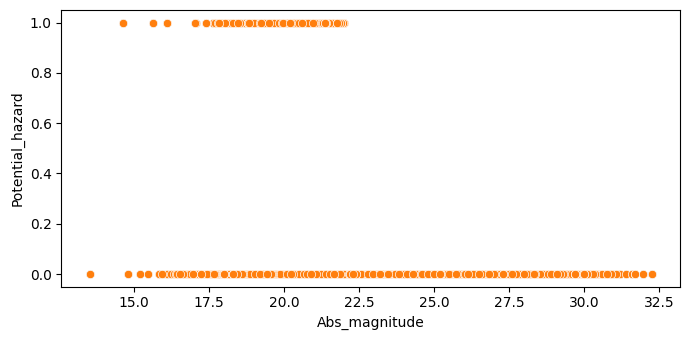

In [625]:
sns.scatterplot(data=df,x='Abs_magnitude', y='Potential_hazard')
sns.scatterplot(data=df,x='Abs_magnitude', y='Potential_hazard')

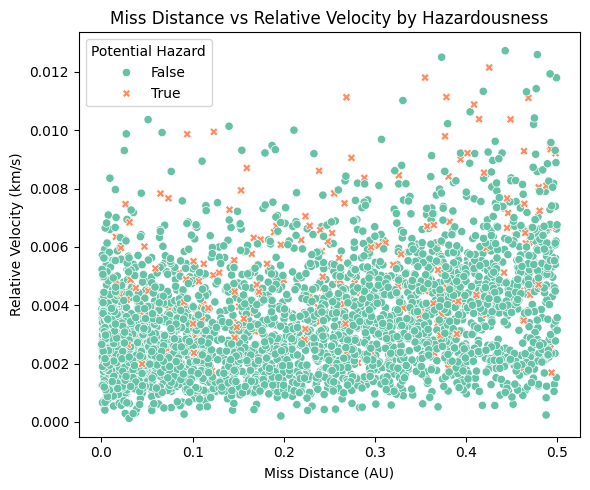

In [626]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.scatterplot(
    data=df,
    x='Miss_distance',
    y='Relative_velocity_km_s',
    hue='Potential_hazard',
    style='Potential_hazard',
    palette='Set2',
)
plt.title('Miss Distance vs Relative Velocity by Hazardousness')
plt.xlabel('Miss Distance (AU)')
plt.ylabel('Relative Velocity (km/s)')
plt.legend(title='Potential Hazard')
plt.show()


In [743]:
df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']].corr()


,Relative_velocity_km_s,Abs_magnitude,Max_diameter,Min_diameter,Miss_distance
Relative_velocity_km_s,1.000000,-0.395530,0.313605,0.313605,0.336060
Abs_magnitude,-0.395530,1.000000,-0.661158,-0.661158,-0.320454
Max_diameter,0.313605,-0.661158,1.000000,1.000000,0.201854
Min_diameter,0.313605,-0.661158,1.000000,1.000000,0.201854
Miss_distance,0.336060,-0.320454,0.201854,0.201854,1.000000


In [742]:
df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Relative_velocity_km_s,Abs_magnitude,Max_diameter,Min_diameter,Miss_distance
Relative_velocity_km_s,1.0,-0.3955,0.3136,0.3136,0.3361
Abs_magnitude,-0.3955,1.0,-0.6612,-0.6612,-0.3205
Max_diameter,0.3136,-0.6612,1.0,1.0,0.2019
Min_diameter,0.3136,-0.6612,1.0,1.0,0.2019
Miss_distance,0.3361,-0.3205,0.2019,0.2019,1.0


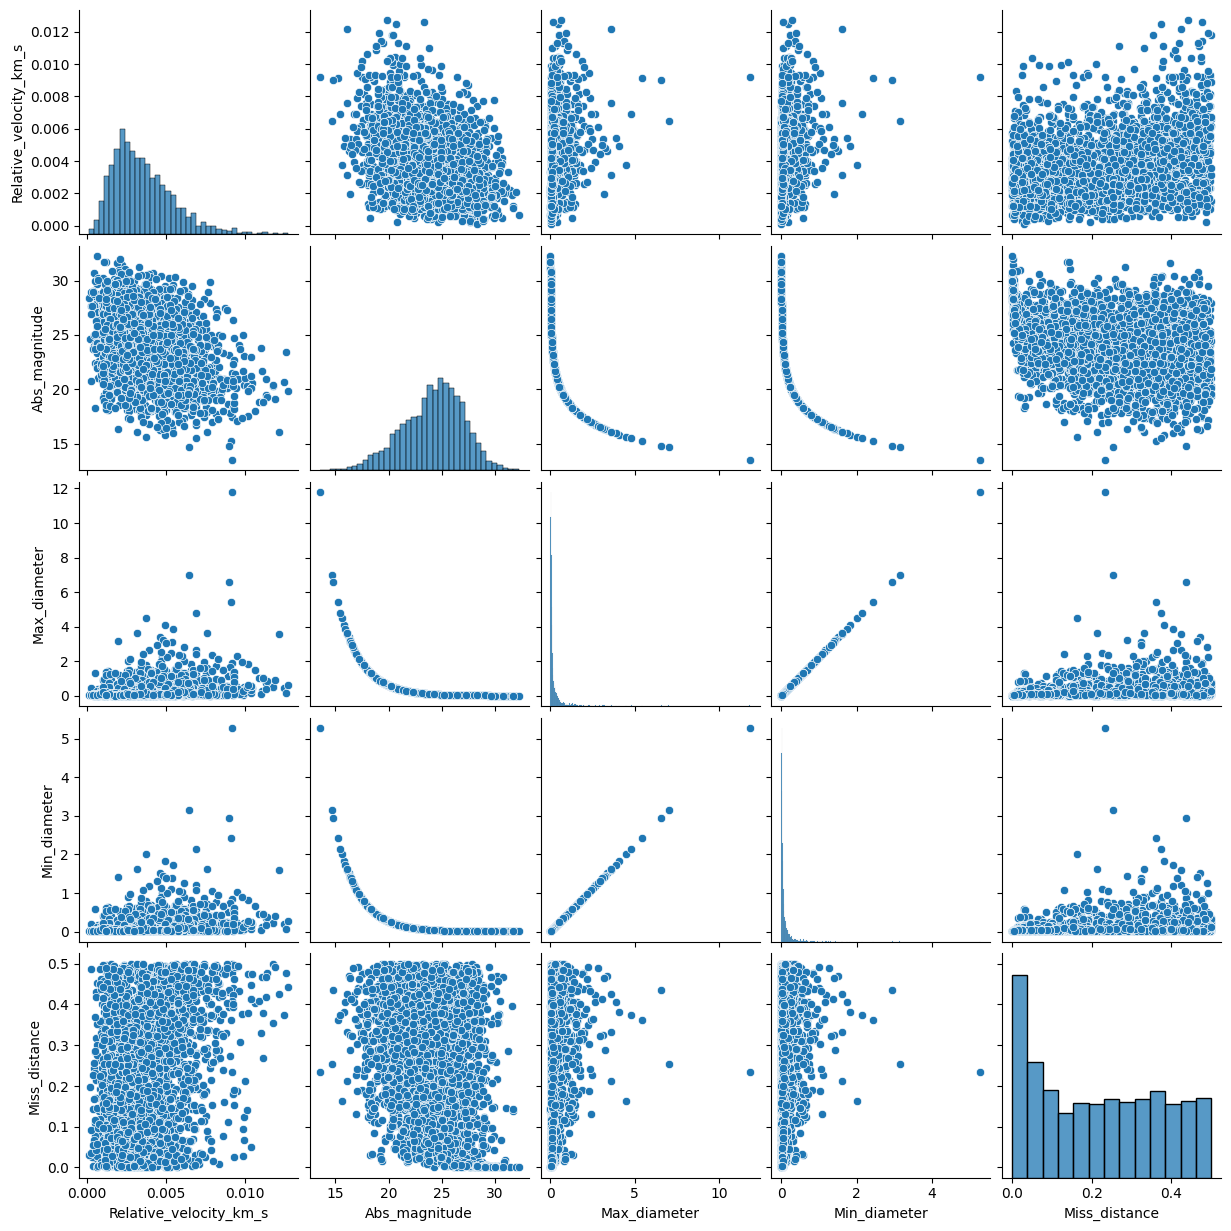

In [757]:
sns.pairplot(df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance']])
plt.show()

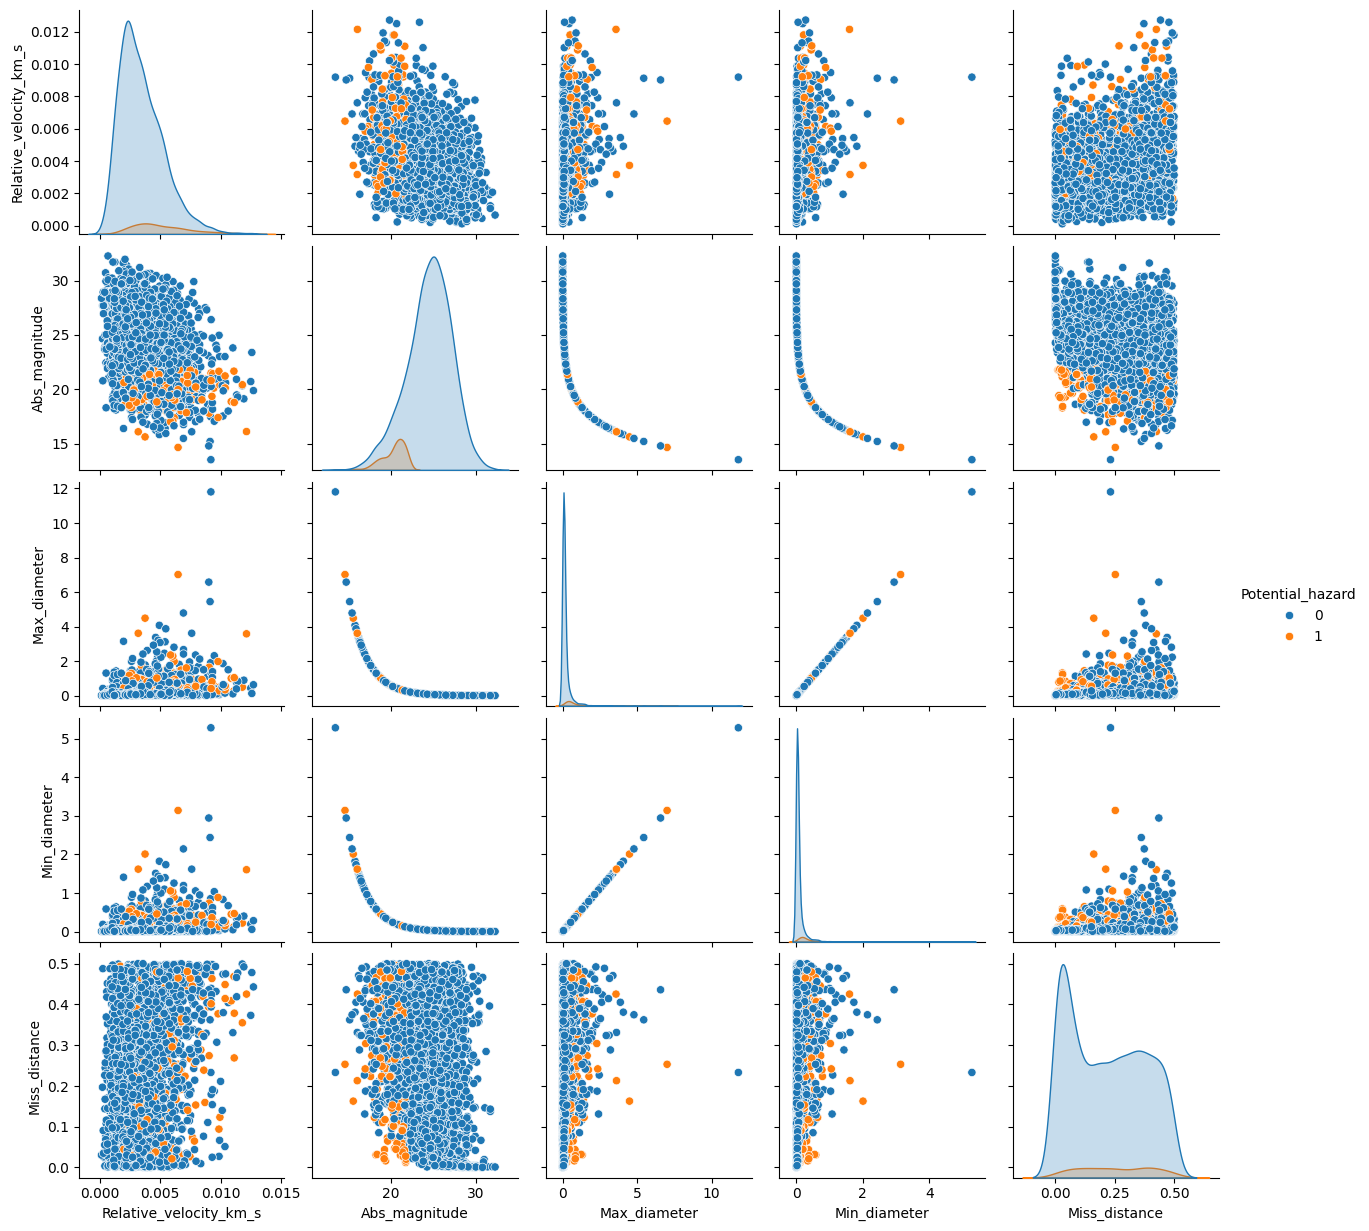

In [755]:
sns.pairplot(df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance','Potential_hazard']], hue="Potential_hazard")
plt.show()

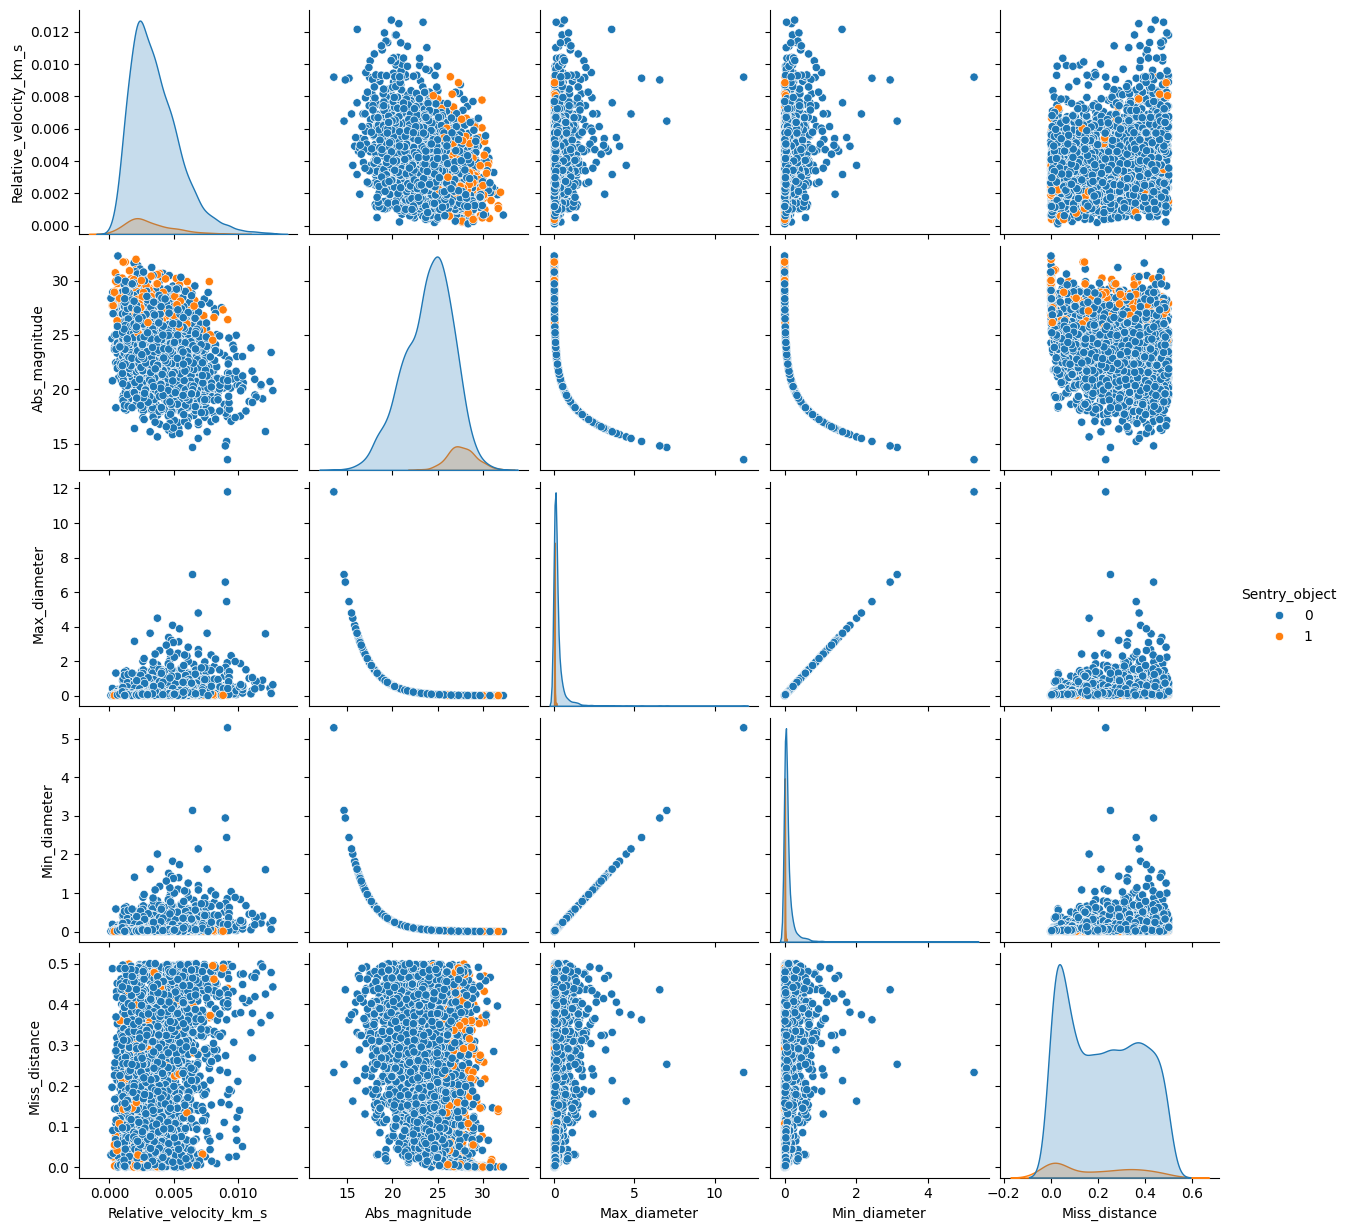

In [759]:
sns.pairplot(df[['Relative_velocity_km_s', 'Abs_magnitude', 'Max_diameter', 'Min_diameter', 'Miss_distance', 'Sentry_object']], hue="Sentry_object")
plt.show()

### Encoding the features:

In this step, we are converting the `Potential_hazard` column and `Sentry_object` columns from boolean to binary (`1/0`) to help in easy processing while making machine learning models.

In [628]:
df['Potential_hazard'] = df['Potential_hazard'].astype(int)
df['Sentry_object'] = df['Sentry_object'].astype(int)

### Spliting the data using Stratified Sampling

In [629]:
df['Potential_hazard'].value_counts(normalize=True)*100

Potential_hazard
0    93.78449
1     6.21551
Name: proportion, dtype: float64

In [729]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [730]:
df.columns

Index(['ID', 'Abs_magnitude', 'Min_diameter', 'Max_diameter',
       'Potential_hazard', 'Close_approach_date', 'Miss_distance',
       'Sentry_object', 'Relative_velocity_km_s'],
      dtype='object')

In [731]:
X = df[['Abs_magnitude', 'Min_diameter', 'Max_diameter','Miss_distance','Relative_velocity_km_s']]
Y = df['Potential_hazard']

In [732]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=1, stratify=Y)

In [733]:
Y_train.value_counts(normalize=True)*100

Potential_hazard
0    93.770174
1     6.229826
Name: proportion, dtype: float64

In [734]:
Y_test.value_counts(normalize=True)*100

Potential_hazard
0    93.913043
1     6.086957
Name: proportion, dtype: float64

In [735]:
from sklearn.ensemble import RandomForestClassifier

In [746]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

In [747]:
Y_pred = rf.predict(X_test)
print('The accuracy score of Random Forest Classifier on test set is  {:.2f}'.format(rf.score(X_test, Y_test)))

The accuracy score of Random Forest Classifier on test set is  0.94


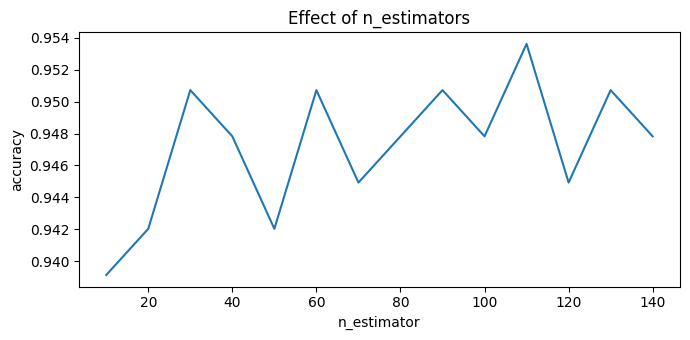

In [748]:
# Try different numbers of n_estimators
estimators = np.arange(10, 150, 10)
accuracy = []

for n in estimators:
    rf.set_params(n_estimators=n)
    rf.fit(X_train, Y_train)
    Y_pred=rf.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("accuracy")
plt.plot(estimators, accuracy);

### Cross Validation

In [749]:
cv_score_rf = cross_val_score(RandomForestClassifier(),X, Y, cv=40)
mean_cv_score_rf = mean(cv_score_rf)
print(mean_cv_score_rf)

0.9422113071371291


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_train)
print(confusion_matrix)